In [2]:
import numpy as np
import matplotlib.pyplot as plt

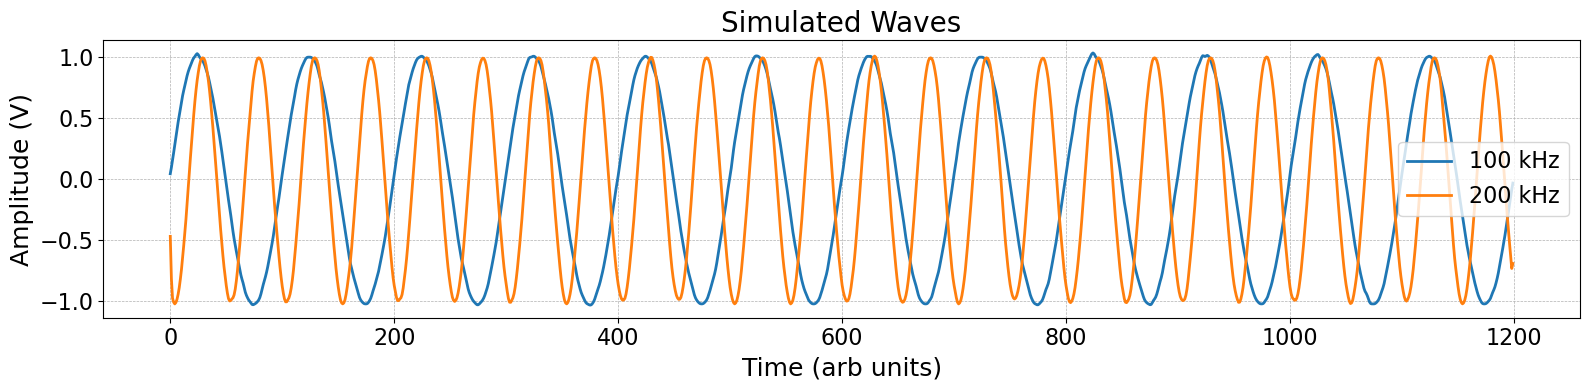

In [3]:
# Load data from csv file
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

data = np.loadtxt('phase-extraction/waves.csv', delimiter=',', skiprows = 2, usecols= (0,1,2))

# Define font size
label_font_size = 16
title_font_size = 18

# Separate the data into time and amplitude for clarity
# assuming that the first column is time and the second column is amplitude
time = data[:,0]
amplitude = data[:,1]
amplitude_2 = data[:,2]

# Define a window size for the smoothing filter
window_size = 6

# Create a smoothing filter with the given window size
window = scipy.signal.windows.hann(window_size)

# Apply the smoothing filter to the amplitude data
amplitude_smooth = scipy.signal.convolve(amplitude, window, mode='same') / sum(window)
amplitude_2_smooth = scipy.signal.convolve(amplitude_2, window, mode='same') / sum(window)

# Plot the data with figure size 12x4
plt.figure(figsize=(16, 4))
plt.plot(time, amplitude_smooth,'-', lw=2, label = '100 kHz')
plt.plot(time, amplitude_2_smooth,'-', lw = 2, label = '200 kHz')

plt.title('Simulated Waves', fontsize=title_font_size+2)
plt.xlabel('Time (arb units)', fontsize=title_font_size)
plt.ylabel('Amplitude (V)', fontsize=title_font_size)
plt.legend(loc = 'right',fontsize=label_font_size)
plt.tick_params(axis='both', which='major', labelsize=16)

# Add a grid with ls = '--' and lw = '0.5'
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('waves-in.png', dpi = 300)
plt.show()


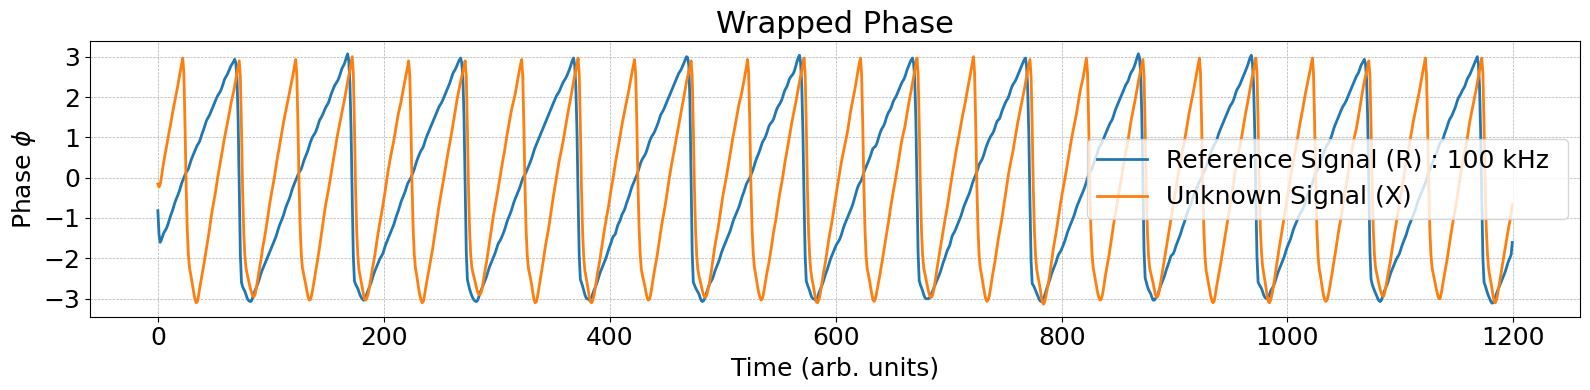

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

# Load data from csv file
data = np.loadtxt('phase-extraction/arc-sin.csv', delimiter=',', skiprows=2, usecols=(0, 1, 2))

# Separate the data into time and amplitude for clarity
# assuming that the first column is time and the second column is amplitude
time = data[:, 0]
amplitude = data[:, 1]
amplitude_2 = data[:, 2]

# Scale the amplitude values to be between -pi and pi
scaled_amplitude = (amplitude - np.min(amplitude)) / (np.max(amplitude) - np.min(amplitude)) * (2 * np.pi) - np.pi
scaled_amplitude_2 = (amplitude_2 - np.min(amplitude_2)) / (np.max(amplitude_2) - np.min(amplitude_2)) * (2 * np.pi) - np.pi

# Define font size
label_font_size = 18
title_font_size = 20

# Create a smoothing filter with window size = 6
window_size = 6
window = scipy.signal.windows.hann(window_size)

# Apply the smoothing filter to the scaled amplitude data
smoothed_amplitude = scipy.signal.convolve(scaled_amplitude, window, mode='same') / sum(window)
smoothed_amplitude_2 = scipy.signal.convolve(scaled_amplitude_2, window, mode='same') / sum(window)

# Plot the data with figure size 12x4
plt.figure(figsize=(16, 4))
plt.plot(time, smoothed_amplitude, '-', lw=2, label = 'Reference Signal (R) : 100 kHz ')
plt.plot(time, smoothed_amplitude_2, '-', lw=2, label = 'Unknown Signal (X)')

plt.title('Wrapped Phase', fontsize=title_font_size+2)
plt.xlabel('Time (arb. units)', fontsize=label_font_size)
plt.ylabel('Phase $\\phi$', fontsize=label_font_size)
plt.legend(fontsize=label_font_size)
plt.xticks(fontsize=label_font_size)
plt.yticks(fontsize=label_font_size)

# Add a grid with ls='--' and lw=0.5
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('wrp-ph.png', dpi = 300)
plt.show()


In [39]:
offset_c = smoothed_amplitude_2[0]

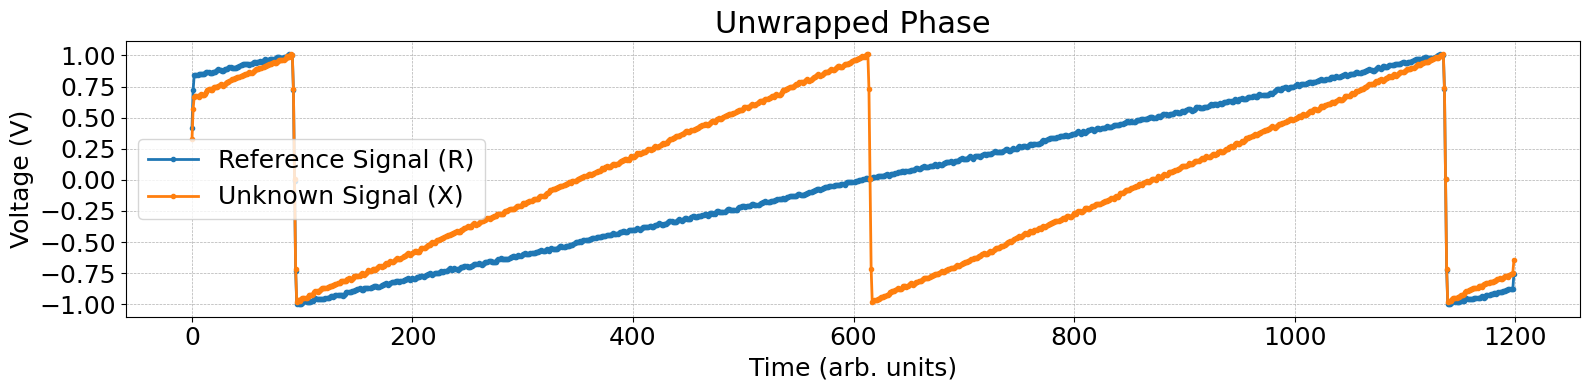

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

# Load data from csv file
data = np.loadtxt('NewFile7.csv', delimiter=',', skiprows = 2, usecols= (0,1,2))

# Separate the data into time and amplitude for clarity
# assuming that the first column is time and the second column is amplitude
time = data[:,0]
amplitude = data[:,1]
amplitude_2 = data[:,2]

# Create a smoothing filter with window size = 6
window_size = 6
window = scipy.signal.windows.hann(window_size)

# Apply the smoothing filter to the amplitude data
smoothed_amplitude = scipy.signal.convolve(amplitude, window, mode='same') / sum(window)
smoothed_amplitude_2 = scipy.signal.convolve(amplitude_2, window, mode='same') / sum(window)

# Define font size
label_font_size = 18
title_font_size = 20

k = 0
k2 = 0
j = len(smoothed_amplitude)

# Subtract the first time point from all time points to start from 0
cropped_time = time[k:j] - time[k]
cropped_time_2 = time[k2:j] - time[k]

# Plot the data with figure size 12x4
plt.figure(figsize=(16, 4))
plt.plot(cropped_time - k, smoothed_amplitude[k:j], '.-', lw=2, label = 'Reference Signal (R)')
plt.plot(cropped_time_2 - k2, smoothed_amplitude_2[k2:j], '.-', lw=2, label = 'Unknown Signal (X)')

plt.title('Unwrapped Phase', fontsize=title_font_size+2)
plt.xlabel('Time (arb. units)', fontsize=label_font_size)
plt.ylabel('Voltage (V)', fontsize=label_font_size)
plt.legend(fontsize=label_font_size)
plt.xticks(fontsize=label_font_size)
plt.yticks(fontsize=label_font_size)

# Add a grid with ls='--' and lw=0.5
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
#plt.savefig('unwrp-ph.png', dpi = 300)
plt.show()


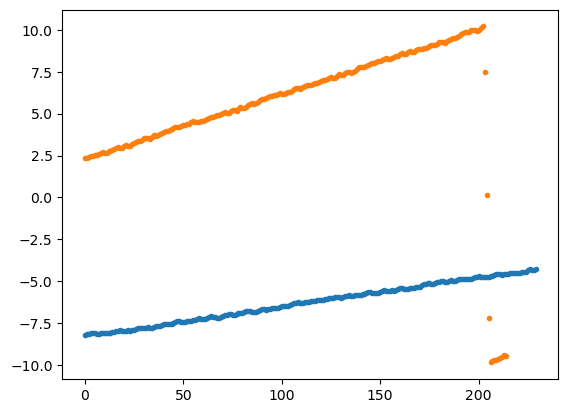

In [68]:
smoothed_amplitude_crop_1 = smoothed_amplitude[95:]
smoothed_amplitude_crop_2 = smoothed_amplitude_2[95:]

plt.plot(smoothed_amplitude_crop_1,'.')
plt.plot(smoothed_amplitude_crop_2,'.')

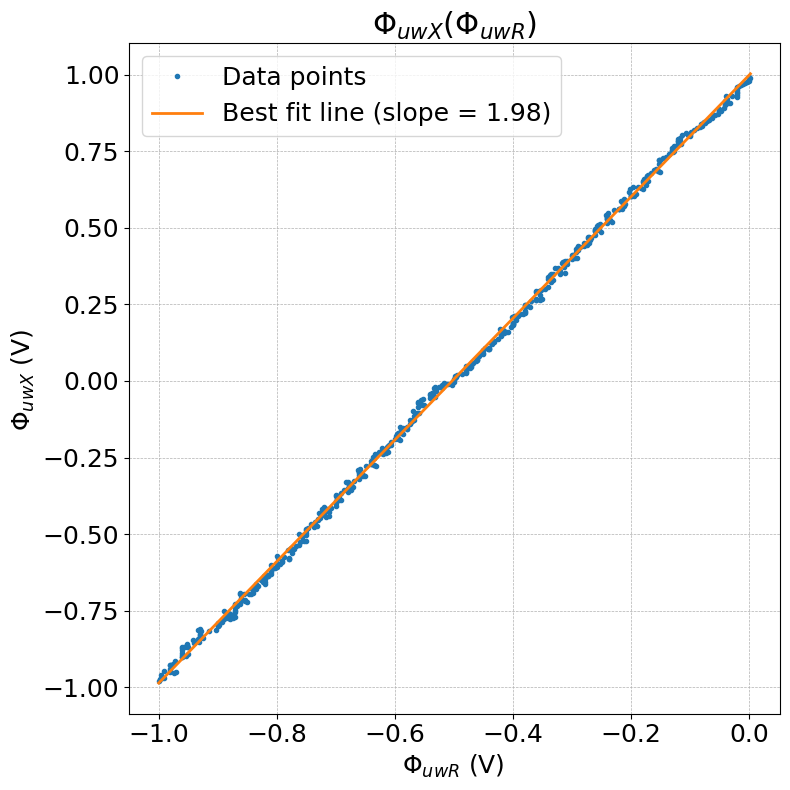

1.983921797742697


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define font size
label_font_size = 18
title_font_size = 20

# Subtract the first time point from all time points to start from 0
cropped_time = time[1:2] - time[1]

# Calculate the best fit line
slope, intercept, r_value, p_value, std_err = linregress(smoothed_amplitude_crop_1, smoothed_amplitude_crop_2)
best_fit_line = slope * np.array(smoothed_amplitude_crop_1) + intercept

# Plot the data points
plt.figure(figsize=(8, 8))
plt.plot(smoothed_amplitude_crop_1, smoothed_amplitude_crop_2, '.', label='Data points')

# Plot the best fit line
plt.plot(smoothed_amplitude_crop_1, best_fit_line, '-', lw=2, label=f'Best fit line (slope = {slope:.2f})')

plt.title('$\Phi_{uwX}(\Phi_{uwR})$', fontsize=title_font_size+2)
plt.xlabel('$\Phi_{uwR}$ (V) ', fontsize=label_font_size)
plt.ylabel('$\Phi_{uwX}$ (V) ', fontsize=label_font_size)
plt.legend(fontsize=label_font_size)
plt.xticks(fontsize=label_font_size)
plt.yticks(fontsize=label_font_size)

# Add a grid with ls='--' and lw=0.5
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('amplitude_comparison.png', dpi = 300)

# Show the plot
plt.show()

print(slope)

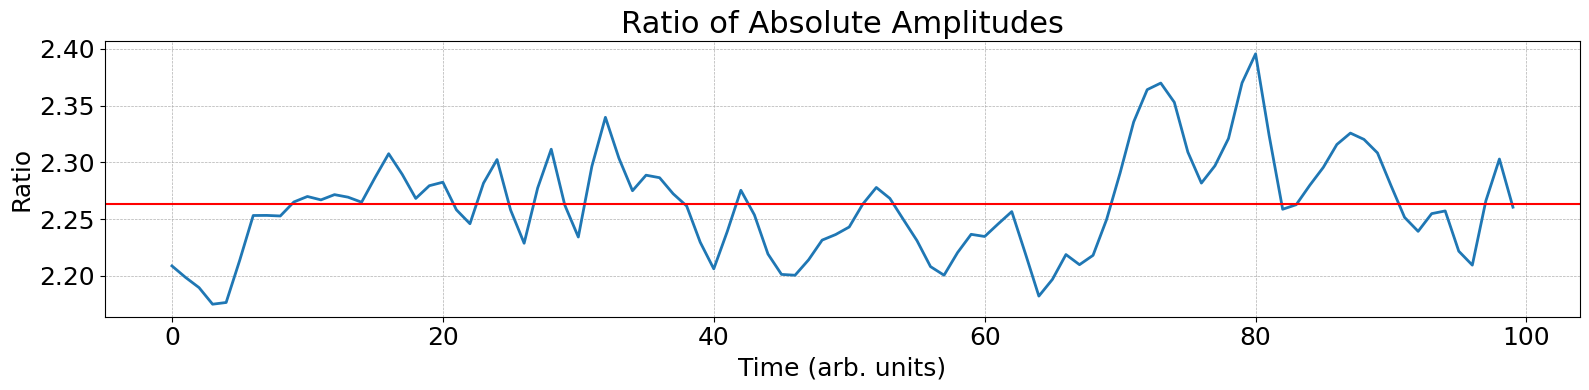

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

# Assuming smoothed_amplitude and smoothed_amplitude_2 are defined
# And k and j are the indices you're interested in

# Calculate the ratio
test_arr = np.array(np.absolute(smoothed_amplitude_2[k:j])/np.absolute(smoothed_amplitude[k:j]))

# Define font size
label_font_size = 18
title_font_size = 20

# Subtract the first time point from all time points to start from 0
cropped_time = time[k:j] - time[k]

# Plot the ratio with figure size 12x4
plt.figure(figsize=(16, 4))
plt.plot(cropped_time, test_arr, '-', lw=2)

# Draw a horizontal line at the average value of the ratio
plt.axhline(np.average(test_arr), color='r')

plt.title('Ratio of Absolute Amplitudes', fontsize=title_font_size+2)
plt.xlabel('Time (arb. units)', fontsize=label_font_size)
plt.ylabel('Ratio', fontsize=label_font_size)
plt.xticks(fontsize=label_font_size)
plt.yticks(fontsize=label_font_size)

# Add a grid with ls='--' and lw=0.5
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('ratio.png', dpi = 300)

# Show the plot
plt.show()


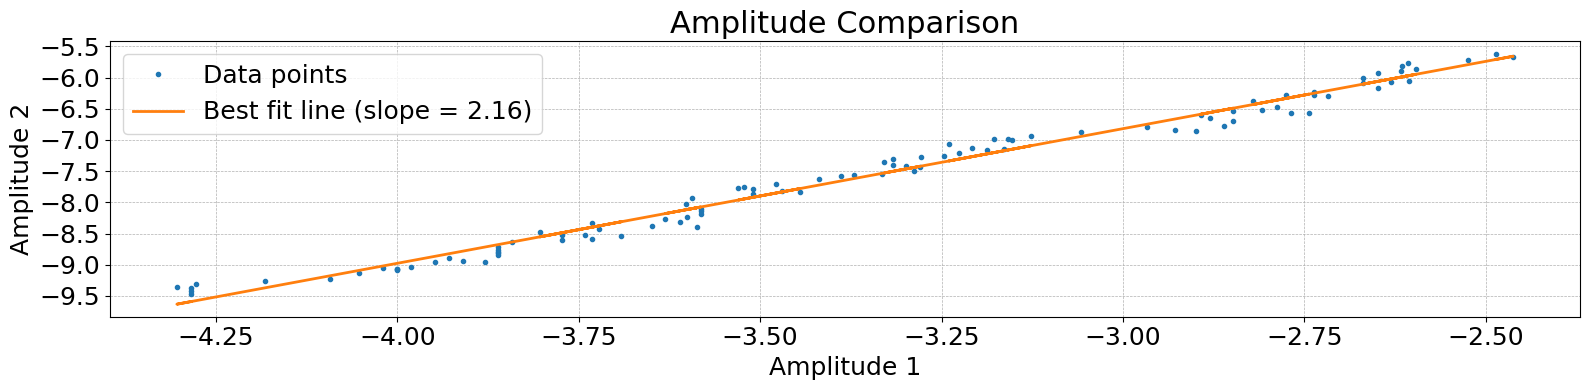

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define font size
label_font_size = 18
title_font_size = 20

# Subtract the first time point from all time points to start from 0
cropped_time = time[k:j] - time[k]

# Calculate the best fit line
slope, intercept, r_value, p_value, std_err = linregress(smoothed_amplitude[k:j], smoothed_amplitude_2[k:j])
best_fit_line = slope * smoothed_amplitude[k:j] + intercept

# Plot the data points
plt.figure(figsize=(16, 4))
plt.plot(smoothed_amplitude[k:j], smoothed_amplitude_2[k:j], '.', label='Data points')

# Plot the best fit line
plt.plot(smoothed_amplitude[k:j], best_fit_line, '-', lw=2, label=f'Best fit line (slope = {slope:.2f})')

plt.title('Amplitude Comparison', fontsize=title_font_size+2)
plt.xlabel('Amplitude 1', fontsize=label_font_size)
plt.ylabel('Amplitude 2', fontsize=label_font_size)
plt.legend(fontsize=label_font_size)
plt.xticks(fontsize=label_font_size)
plt.yticks(fontsize=label_font_size)

# Add a grid with ls='--' and lw=0.5
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('amplitude_comparison.png', dpi = 300)

# Show the plot
plt.show()


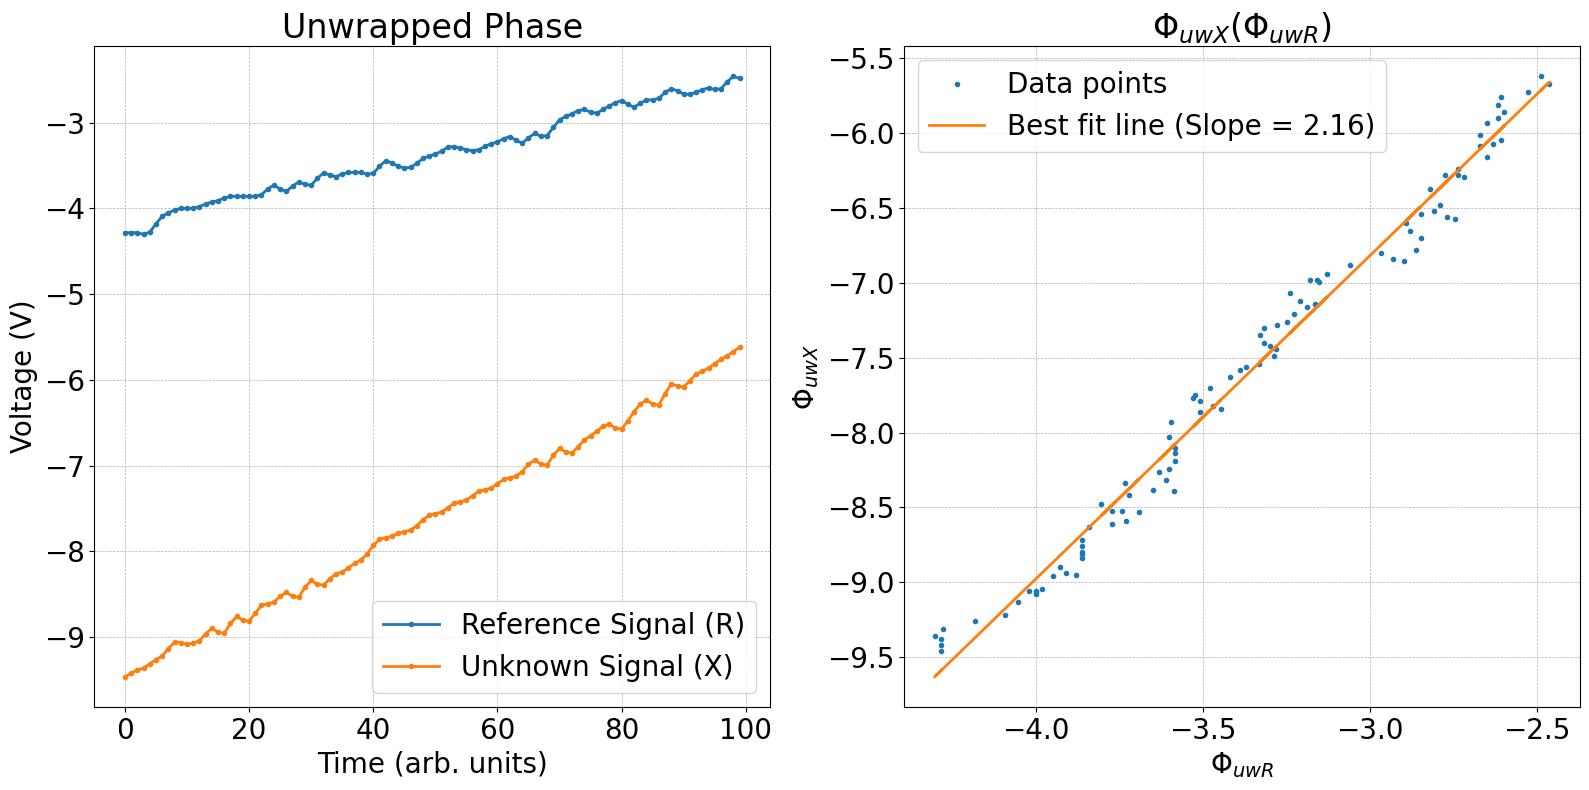

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from scipy.stats import linregress

# Load data from csv file
data = np.loadtxt('phase-extraction/unwrp-ph.csv', delimiter=',', skiprows = 2, usecols= (0,1,2))

# Separate the data into time and amplitude for clarity
time = data[:,0]
amplitude = data[:,1]
amplitude_2 = data[:,2]

# Create a smoothing filter with window size = 6
window_size = 6
window = scipy.signal.windows.hann(window_size)

# Apply the smoothing filter to the amplitude data
smoothed_amplitude = scipy.signal.convolve(amplitude*9, window, mode='same') / sum(window)
smoothed_amplitude_2 = scipy.signal.convolve(amplitude_2, window, mode='same') / sum(window)

# Define font size
label_font_size = 20
title_font_size = 22

k = 310
j = 410

# Subtract the first time point from all time points to start from 0
cropped_time = time[k:j] - time[k]

# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the data in the first subplot
axs[0].plot(cropped_time, smoothed_amplitude[k:j], '.-', lw=2, label = 'Reference Signal (R)')
axs[0].plot(cropped_time, smoothed_amplitude_2[k:j], '.-', lw=2, label = 'Unknown Signal (X)')

axs[0].set_title('Unwrapped Phase', fontsize=title_font_size+2)
axs[0].set_xlabel('Time (arb. units)', fontsize=label_font_size)
axs[0].set_ylabel('Voltage (V)', fontsize=label_font_size)
axs[0].legend(fontsize=label_font_size)
axs[0].grid(True, linestyle='--', linewidth=0.5)
axs[0].tick_params(axis='both', which='major', labelsize=label_font_size)

# Calculate the best fit line
slope, intercept, r_value, p_value, std_err = linregress(smoothed_amplitude[k:j], smoothed_amplitude_2[k:j])
best_fit_line = slope * smoothed_amplitude[k:j] + intercept

# Plot the data points in the second subplot
axs[1].plot(smoothed_amplitude[k:j], smoothed_amplitude_2[k:j], '.', label='Data points')

# Plot the best fit line
axs[1].plot(smoothed_amplitude[k:j], best_fit_line, '-', lw=2, label=f'Best fit line (Slope = {(slope):.2f})')

axs[1].set_title('$\Phi_{uwX}(\Phi_{uwR})$', fontsize=title_font_size+2)
axs[1].set_xlabel('$\Phi_{uwR}$', fontsize=label_font_size)
axs[1].set_ylabel('$\Phi_{uwX}$', fontsize=label_font_size)
axs[1].legend(fontsize=label_font_size)
axs[1].grid(True, linestyle='--', linewidth=0.5)
axs[1].tick_params(axis='both', which='major', labelsize=label_font_size)

# Adjust the layout
plt.tight_layout()
plt.savefig('unwrp-ph.png', dpi = 300)

# Show the plot
plt.show()